In [4]:
import cv2
import pandas as pd
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.models import load_model

from sklearn.model_selection import train_test_split

SIZE_FACE = 48
EMOTIONS = ['angry', 'disgusted', 'fearful', 'happy', 'sad', 'surprised', 'neutral']
np.random.seed(42)


In [5]:
from vis.utils import utils
from keras import activations

model = load_model('./data/keras_model.h5')
model_original = load_model('./data/keras_model.h5')

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'dense_16')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

model.summary()

ResourceExhaustedError: OOM when allocating tensor with shape[4608,3072]
	 [[Node: dense_1_1/random_uniform/RandomUniform = RandomUniform[T=DT_INT32, dtype=DT_FLOAT, seed=87654321, seed2=9958614, _device="/job:localhost/replica:0/task:0/device:GPU:0"](dense_1_1/random_uniform/shape)]]

Caused by op 'dense_1_1/random_uniform/RandomUniform', defined at:
  File "/home/charles.xavier.verleyen/yes/envs/emotions-recognition/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/charles.xavier.verleyen/yes/envs/emotions-recognition/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/charles.xavier.verleyen/yes/envs/emotions-recognition/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/charles.xavier.verleyen/yes/envs/emotions-recognition/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/charles.xavier.verleyen/yes/envs/emotions-recognition/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/charles.xavier.verleyen/yes/envs/emotions-recognition/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/charles.xavier.verleyen/yes/envs/emotions-recognition/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/charles.xavier.verleyen/yes/envs/emotions-recognition/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/charles.xavier.verleyen/yes/envs/emotions-recognition/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/charles.xavier.verleyen/yes/envs/emotions-recognition/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/charles.xavier.verleyen/yes/envs/emotions-recognition/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/charles.xavier.verleyen/yes/envs/emotions-recognition/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/charles.xavier.verleyen/yes/envs/emotions-recognition/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/charles.xavier.verleyen/yes/envs/emotions-recognition/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/charles.xavier.verleyen/yes/envs/emotions-recognition/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/charles.xavier.verleyen/yes/envs/emotions-recognition/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/charles.xavier.verleyen/yes/envs/emotions-recognition/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/charles.xavier.verleyen/yes/envs/emotions-recognition/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/charles.xavier.verleyen/yes/envs/emotions-recognition/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/charles.xavier.verleyen/yes/envs/emotions-recognition/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-7488f41651a5>", line 5, in <module>
    model = load_model('./data/keras_model.h5')
  File "/home/charles.xavier.verleyen/yes/envs/emotions-recognition/lib/python3.6/site-packages/keras/models.py", line 239, in load_model
    model = model_from_config(model_config, custom_objects=custom_objects)
  File "/home/charles.xavier.verleyen/yes/envs/emotions-recognition/lib/python3.6/site-packages/keras/models.py", line 313, in model_from_config
    return layer_module.deserialize(config, custom_objects=custom_objects)
  File "/home/charles.xavier.verleyen/yes/envs/emotions-recognition/lib/python3.6/site-packages/keras/layers/__init__.py", line 54, in deserialize
    printable_module_name='layer')
  File "/home/charles.xavier.verleyen/yes/envs/emotions-recognition/lib/python3.6/site-packages/keras/utils/generic_utils.py", line 139, in deserialize_keras_object
    list(custom_objects.items())))
  File "/home/charles.xavier.verleyen/yes/envs/emotions-recognition/lib/python3.6/site-packages/keras/models.py", line 1214, in from_config
    model.add(layer)
  File "/home/charles.xavier.verleyen/yes/envs/emotions-recognition/lib/python3.6/site-packages/keras/models.py", line 475, in add
    output_tensor = layer(self.outputs[0])
  File "/home/charles.xavier.verleyen/yes/envs/emotions-recognition/lib/python3.6/site-packages/keras/engine/topology.py", line 575, in __call__
    self.build(input_shapes[0])
  File "/home/charles.xavier.verleyen/yes/envs/emotions-recognition/lib/python3.6/site-packages/keras/layers/core.py", line 828, in build
    constraint=self.kernel_constraint)
  File "/home/charles.xavier.verleyen/yes/envs/emotions-recognition/lib/python3.6/site-packages/keras/legacy/interfaces.py", line 87, in wrapper
    return func(*args, **kwargs)
  File "/home/charles.xavier.verleyen/yes/envs/emotions-recognition/lib/python3.6/site-packages/keras/engine/topology.py", line 396, in add_weight
    weight = K.variable(initializer(shape),
  File "/home/charles.xavier.verleyen/yes/envs/emotions-recognition/lib/python3.6/site-packages/keras/initializers.py", line 212, in __call__
    dtype=dtype, seed=self.seed)
  File "/home/charles.xavier.verleyen/yes/envs/emotions-recognition/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 3544, in random_uniform
    dtype=dtype, seed=seed)
  File "/home/charles.xavier.verleyen/yes/envs/emotions-recognition/lib/python3.6/site-packages/tensorflow/python/ops/random_ops.py", line 240, in random_uniform
    shape, dtype, seed=seed1, seed2=seed2)
  File "/home/charles.xavier.verleyen/yes/envs/emotions-recognition/lib/python3.6/site-packages/tensorflow/python/ops/gen_random_ops.py", line 473, in _random_uniform
    name=name)
  File "/home/charles.xavier.verleyen/yes/envs/emotions-recognition/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/charles.xavier.verleyen/yes/envs/emotions-recognition/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/home/charles.xavier.verleyen/yes/envs/emotions-recognition/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[4608,3072]
	 [[Node: dense_1_1/random_uniform/RandomUniform = RandomUniform[T=DT_INT32, dtype=DT_FLOAT, seed=87654321, seed2=9958614, _device="/job:localhost/replica:0/task:0/device:GPU:0"](dense_1_1/random_uniform/shape)]]


NameError: name 'model_original' is not defined

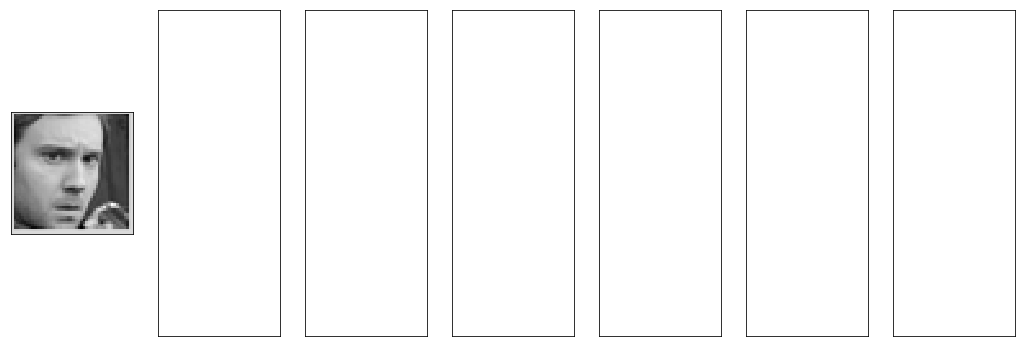

In [3]:
from vis.utils import utils
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

img= []
for i in range(len(EMOTIONS)):
    img.append(cv2.imread(r'./data/image' +str(i)+ '.png', 0))


f, ax = plt.subplots(1, len(img))
for i in range(len(img)):
    ax[i].imshow(img[i], cmap='gray')
    plt.setp(ax, xticks=[], yticks=[])
    img[i] = img[i].reshape(-1, 48, 48,1)
    prediction = model_original.predict(img[i])
    index = prediction.argmax()
    ax[i].set_title( EMOTIONS[i] + '\npred=' + EMOTIONS[index] + '(' + str(prediction[0][index]*100) + '%)')


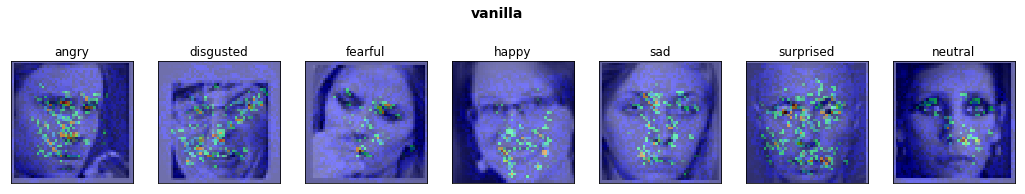

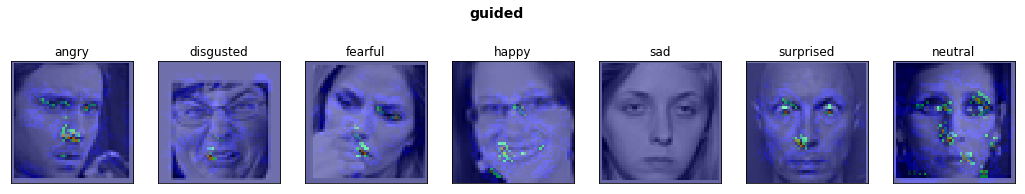

In [4]:
from vis.visualization import visualize_saliency, overlay
from vis.utils import utils
from keras import activations
import matplotlib.cm as cm

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'dense_16')

for modifier in [None, 'guided']:
    f, ax = plt.subplots(1, len(img))
    f.subplots_adjust(top=1.3)
    plt.suptitle("vanilla" if modifier is None else modifier, fontsize=14, fontweight='bold')
    plt.setp(ax, xticks=[], yticks=[])
    for i, img_ in enumerate(img):    
        grads = visualize_saliency(model, layer_idx, filter_indices=i, 
                                   seed_input=img_, backprop_modifier=modifier)
        jet_heatmap = np.uint8(cm.jet(grads)[..., :3,0] * 255)
        ax[i].set_title(EMOTIONS[i])
        ax[i].imshow(overlay(jet_heatmap, cv2.cvtColor(img_.reshape(48,48),cv2.COLOR_GRAY2RGB)))
        
plt.show()

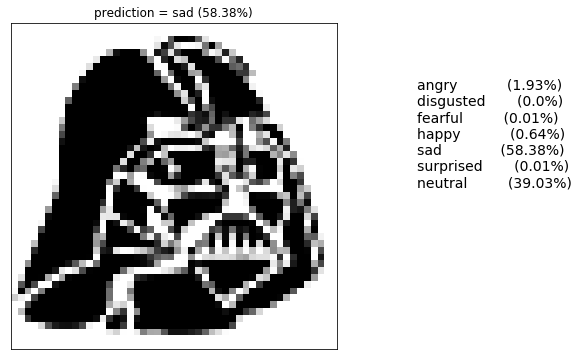

In [5]:
plt.cla()   # Clear axis
plt.clf()   # Clear figure
plt.close() # Close a figure window

img_vader = cv2.imread(r'./data/imageVader.png', 0)
img_vader = cv2.resize(img_vader, (SIZE_FACE, SIZE_FACE), interpolation = cv2.INTER_CUBIC) / 255.0

f, ax = plt.subplots(1, 1)

ax.imshow(img_vader,cmap='gray')
plt.setp(ax, xticks=[], yticks=[])

img_vader = img_vader.reshape(-1, 48, 48,1)
prediction = model_original.predict(img_vader)

index = prediction.argmax()
ax.set_title('prediction = ' + EMOTIONS[index] + ' (' + str(np.around(prediction[0][index]*100,2)) + '%)')

textstr = str()
for i in range(len(EMOTIONS)):
    textstr = textstr + '\n' + EMOTIONS[i] + '\t\t(' + str(np.around(prediction[0][i]*100,2)) + '%)'
    if i == 1 or i == 5:
        textstr = textstr[:textstr.rfind('\t')] + textstr[textstr.rfind('\t')+1:] 

textstr = textstr.expandtabs()

plt.gcf().text(0.7, 0.5, textstr, fontsize=14)

plt.show()